In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

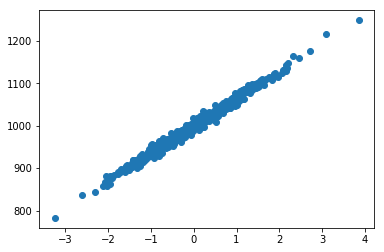

In [37]:
X, y = make_regression(n_samples=500, n_features=1, bias=1000, noise=7.3, random_state=42)

X = X.flatten()

plt.figure()
plt.scatter(X, y)
plt.show()

In [38]:
class LinearRegression:
    
    def __init__(self, lr=.001, itrs=100):
        self.lr = lr
        self.itrs = itrs
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        self.theta = np.ones([2], dtype=float)
        
        errors = []
        for i in range(self.itrs):
            self.gradient_dec()
            errors.append(self.error())
            
        return errors
        
    def gradient_dec(self):
        yh = LinearRegression.hypothesis(self.theta, self.X)
        
        change_slop = np.sum((yh-self.y) * self.X) / len(self.X) 
        change_inter = np.sum((yh-self.y)) / len(self.X)
        
#         print(change_slop, change_inter)
        
        change_slop = change_slop * self.lr
        change_inter = change_inter * self.lr
        
        self.theta[0] -= change_inter 
        self.theta[1] -= change_slop
        
    def predict(self, X):
        return LinearRegression.hypothesis(self.theta, X)
    
    def error(self):
        yp = LinearRegression.hypothesis(self.theta, self.X)
        return np.sum((self.y - yp) ** 2) / len(self.X)
    
    @classmethod
    def hypothesis(cls, theta, X):
        return X * theta[1] + theta[0]

In [39]:
model = LinearRegression(itrs=10000)

In [40]:
errors = model.fit(X, y)

In [41]:
yp = model.predict(X)

In [42]:
model.theta

array([999.66901431,  64.18082313])

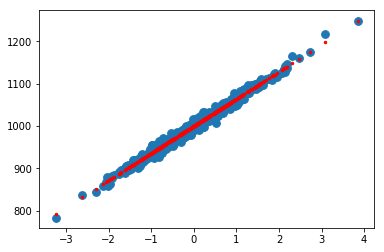

In [43]:
plt.figure()
plt.scatter(X, y, s = 60)
plt.scatter(X, yp, color="red", s = 6)
plt.show()

In [44]:
model.theta

array([999.66901431,  64.18082313])

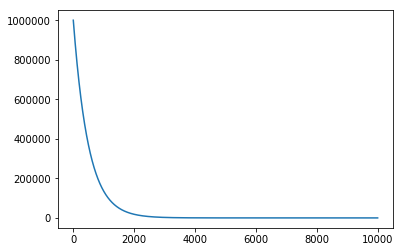

In [45]:
plt.plot(errors)

In [46]:
model.theta

array([999.66901431,  64.18082313])

In [47]:
yh = model.predict(X)

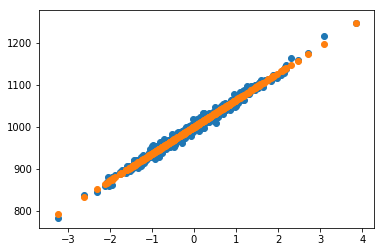

In [48]:
plt.scatter(X, y)
plt.scatter(X, yh)